In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # You can switch to another model
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Dataset
df = pd.read_csv('Dataset/Loan_Pred.csv')  # Replace with your file path
print("Shape:", df.shape)
print("Columns:", df.columns)



Shape: (614, 13)
Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
from sklearn.preprocessing import LabelEncoder
df=df.drop('Loan_ID',axis=1)
cat_cols=['Gender','Married','Education','Self_Employed','Education','Property_Area','Loan_Status']
LE={}
for col in cat_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    LE[col]=le

In [4]:
# Step 2: Basic Preprocessing
# Replace with actual preprocessing
df=df.replace('3+',3)
X = df.drop('Loan_Status', axis=1)  # Replace 'target' with your actual label column
y = df['Loan_Status']

# Optional: Encode categorical features if any
# X = pd.get_dummies(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Step 5: Evaluate Model
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print("\nTrain Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("\nClassification Report (Test):")
print(classification_report(y_test, test_preds))



Train Accuracy: 1.0
Test Accuracy: 0.7642276422764228

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



In [30]:
# Step 6: Detect Overfitting or Underfitting
def check_fit(train_acc, test_acc, tolerance=0.05):
    gap = train_acc - test_acc
    if train_acc > 0.9 and gap > tolerance:
        print("\nOverfitting detected: High train accuracy, low test accuracy.")
    elif train_acc < 0.7 and test_acc < 0.7:
        print("\nUnderfitting detected: Both train and test accuracies are low.")
    else:
        print("\nGood fit: Train and test accuracies are balanced.")

check_fit(train_acc, test_acc)



Overfitting detected: High train accuracy, low test accuracy.


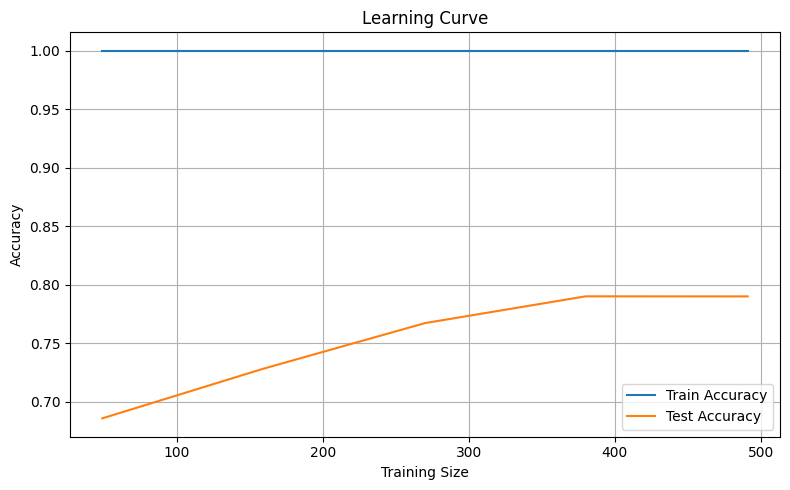

In [32]:

# Optional: Plot learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label="Train Accuracy")
plt.plot(train_sizes, test_scores_mean, label="Test Accuracy")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
train_acc=accuracy_score(y_train,train_preds)
test_acc=accuracy_score(y_test,test_preds)

def overfit(train_acc,test_acc):
    gap=train_acc-test_acc
    if train_acc>0.9 and gap>0.1:
        print("Overfit")
    elif test_acc<0.7 and test_acc<0.7:
        print("Underfit")
    else:
        print("Good")
overfit(train_acc,test_acc)

Overfit


In [9]:
from sklearn.model_selection import learning_curve

train_sizes,train_rate,test_rate=learning_curve(model,X,y,cv=5,scoring='accuracy')

E:\Xai_Req_Setup\.jupyter_env\temp\ipykernel_3516\3609999953.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


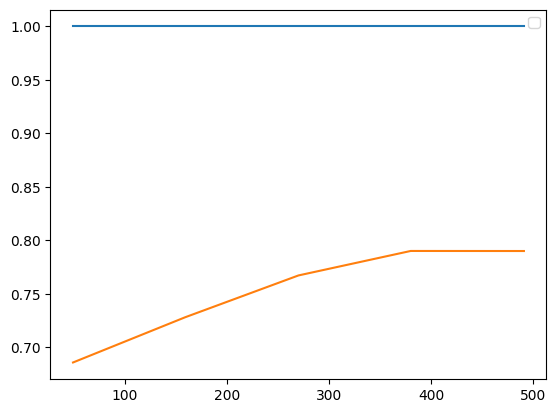

In [16]:
train_scores_mean = np.mean(train_rate, axis=1)
test_scores_mean = np.mean(test_rate, axis=1)

plt.plot(train_sizes,train_scores_mean)
plt.plot(train_sizes,test_scores_mean)
plt.legend()

In [18]:
from sklearn.inspection import permutation_importance
res=permutation_importance(model,X_test,y_test)

<BarContainer object of 11 artists>

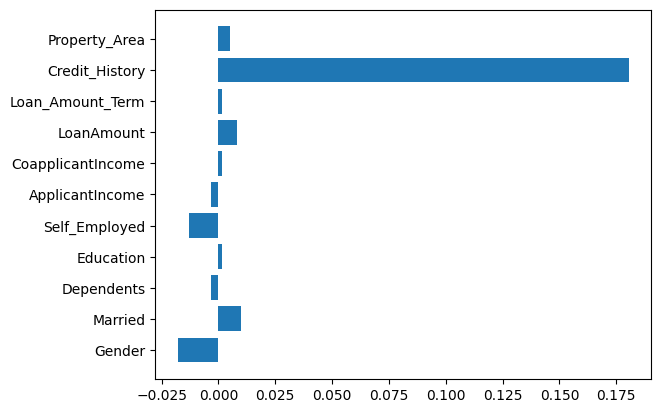

In [22]:
plt.barh(X.columns,res.importances_mean)

<BarContainer object of 11 artists>

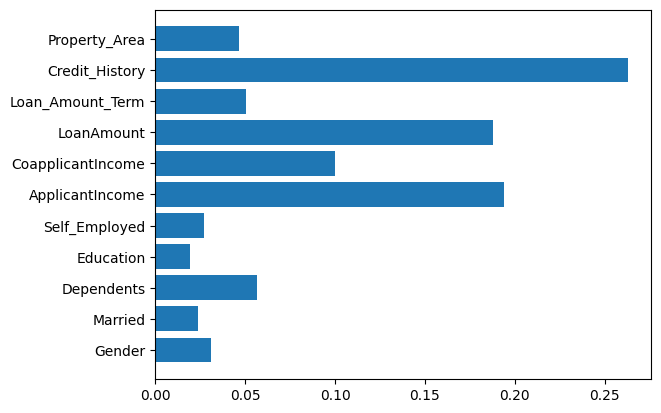

In [23]:
plt.barh(X.columns,model.feature_importances_)